<a href="https://colab.research.google.com/github/SL4D/cv/blob/main/cv_hw_1_10_Belousov_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание 1-10
## Автор: Белоусов Данил

## Задания

1. Повернуть изображение на 45 градусов.
2. Повернуть изображение на 30 градусов вокруг заданной точки.
3. Преобразование в оттенки серого
4. Перевести в hsv
5. Сдвинуть изображение на 10 пикселей вправо.
6. Изменить яркость изображения
7. Измените контрастность изображения
8. Размытие изображения
9. Найдите ребра, используя ядро ​​Собеля/Лапласа.
10. Бинаризация изображения

## Environment setting

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image, ImageEnhance

In [ ]:
# Загрузка изображения
image_path = '/kzn.jpg'  # Укажите путь к изображению
original_image = cv2.imread(image_path)

In [ ]:
# Функция для отображения изображений до и после обработки
def show_comparison(title, original, processed, is_gray=False):
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    plt.title("Original")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    if is_gray:
        plt.imshow(processed, cmap='gray')
    else:
        plt.imshow(cv2.cvtColor(processed, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

## Task 1. Rotate image by $45^{\circ}$


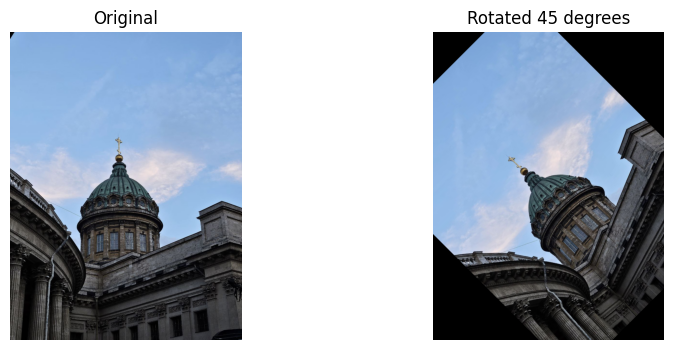

In [ ]:
# 1. Поворот изображения на 45 градусов
(h, w) = original_image.shape[:2]
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, 45, 1.0)
rotated_45 = cv2.warpAffine(original_image, M, (w, h))
show_comparison("Rotated 45 degrees", original_image, rotated_45)

## Task 2. Rotate image by $30^{\circ}$ .

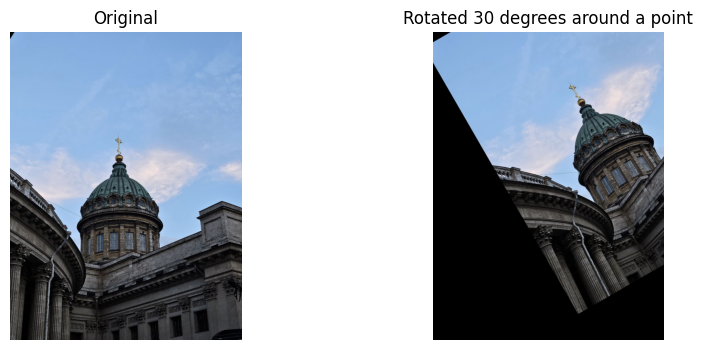

In [ ]:
# 2. Поворот на 30 градусов вокруг заданной точки (например, x=100, y=100)
point = (100, 100)
M2 = cv2.getRotationMatrix2D(point, 30, 1.0)
rotated_30_point = cv2.warpAffine(original_image, M2, (w, h))
show_comparison("Rotated 30 degrees around a point", original_image, rotated_30_point)


## Task 3. Transform into grayscale


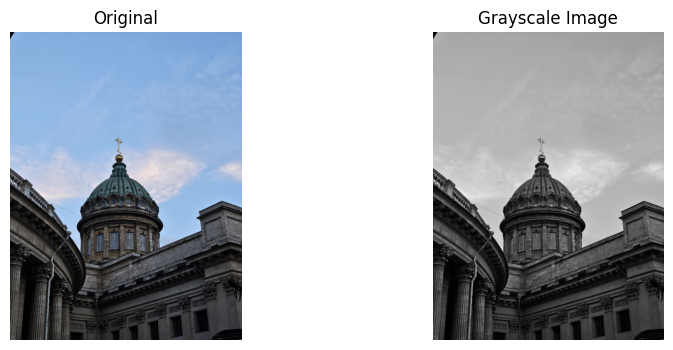

In [ ]:
# 3. Преобразование в оттенки серого
gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
show_comparison("Grayscale Image", original_image, gray_image, is_gray=True)

## Task 4. Transform into hsv



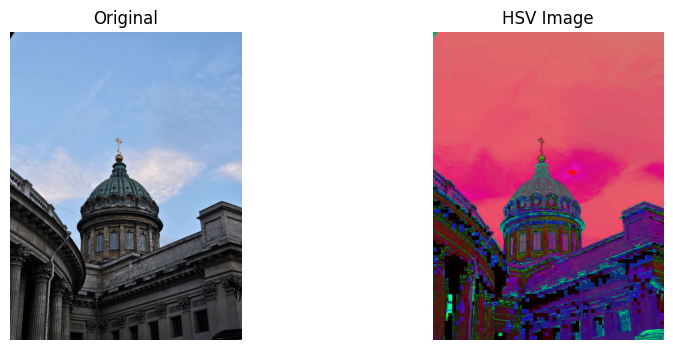

In [ ]:
# 4. Перевод в HSV
hsv_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2HSV)
show_comparison("HSV Image", original_image, hsv_image)


## Task 5. Shift image 10 pixels to the right

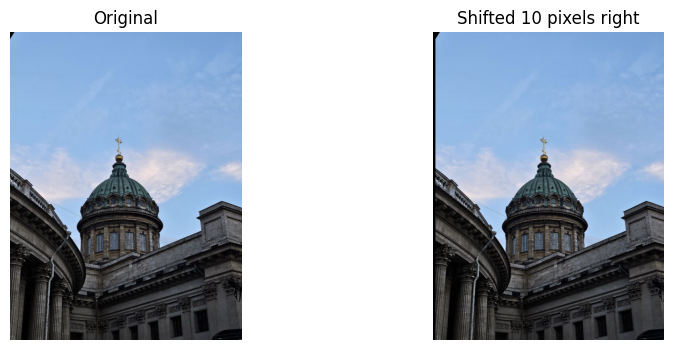

In [ ]:
# 5. Сдвиг изображения на 10 пикселей вправо
M_translation = np.float32([[1, 0, 10], [0, 1, 0]])
shifted_image = cv2.warpAffine(original_image, M_translation, (w, h))
show_comparison("Shifted 10 pixels right", original_image, shifted_image)

## Task 6. Change image brightness



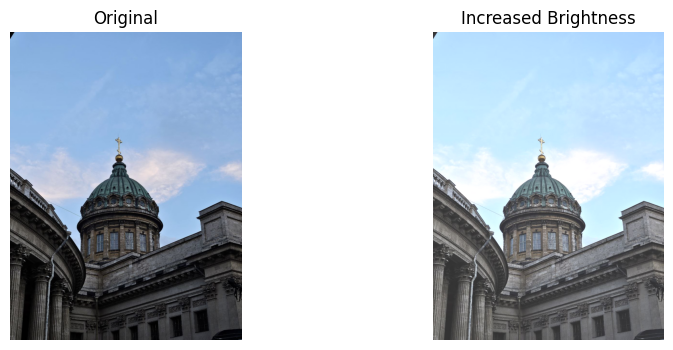

In [ ]:
# 6. Изменение яркости изображения
# Функция для изменения яркости с использованием OpenCV
def adjust_brightness(image, beta=50):
    bright_image = cv2.convertScaleAbs(image, alpha=1.0, beta=beta)  # alpha=1.0 не меняет контраст
    return bright_image

bright_image = adjust_brightness(original_image, beta=50)
show_comparison("Increased Brightness", original_image, bright_image)


## Task 7. Change image contrast


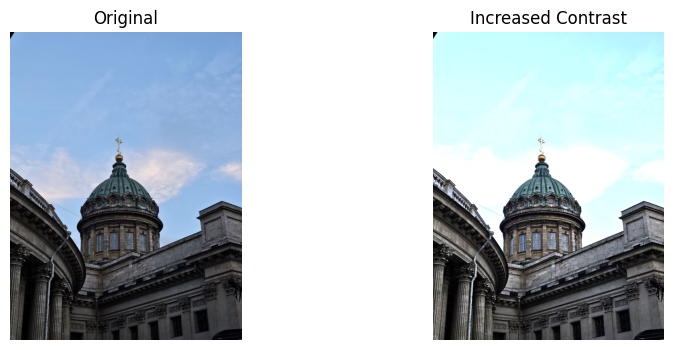

In [ ]:
# 7. Изменение контрастности изображения
def adjust_contrast(image, alpha=1.5):
    contrast_image = cv2.convertScaleAbs(image, alpha=alpha, beta=0)  # beta=0 не меняет яркость
    return contrast_image

contrast_image = adjust_contrast(original_image, alpha=1.5)
show_comparison("Increased Contrast", original_image, contrast_image)

## Task 8. Blur an image


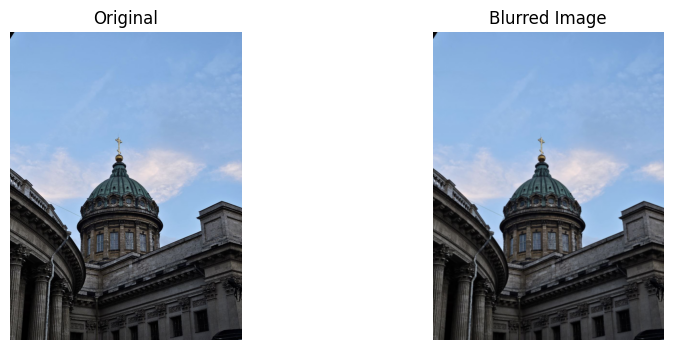

In [ ]:
blurred_image = cv2.GaussianBlur(original_image, (5, 5), 0)
show_comparison("Blurred Image", original_image, blurred_image)

## Task 9. Find edges using Sobel / Laplacian kernel


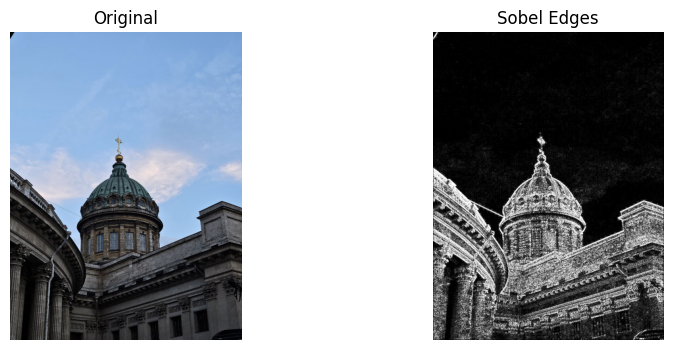

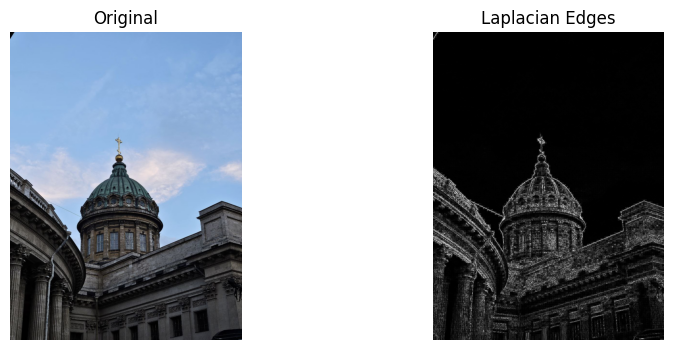

In [ ]:
# 9. Обнаружение границ (Собель и Лаплас)

# с использованием фильтра Собеля
sobel_edges = cv2.Sobel(gray_image, cv2.CV_64F, 1, 1, ksize=5)
sobel_edges = cv2.convertScaleAbs(sobel_edges)  # Конвертация для отображения
show_comparison("Sobel Edges", original_image, sobel_edges, is_gray=True)

# с использованием фильтра Лапласа
laplacian_edges = cv2.Laplacian(gray_image, cv2.CV_64F)
laplacian_edges = cv2.convertScaleAbs(laplacian_edges)  # Конвертация для отображения
show_comparison("Laplacian Edges", original_image, laplacian_edges, is_gray=True)



## Task 10. Binarize an image



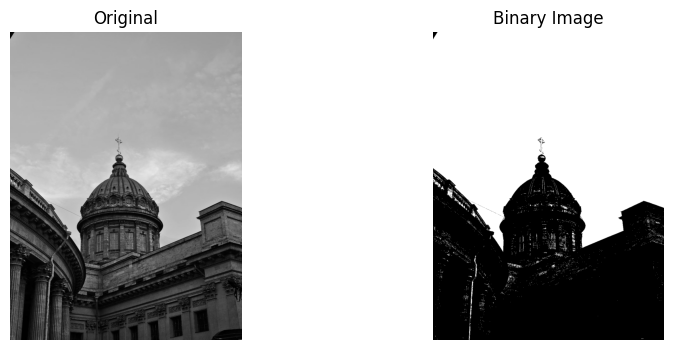

In [ ]:
# 10. Бинаризация изображения
_, binary_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)
show_comparison("Binary Image", gray_image, binary_image, is_gray=True)